https://www.kaggle.com/code/prakharprasad/time-series-vector-autoregression/notebook

## Vector Auto Regression

In [1]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import mse,rmse

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#read the data
df = pd.read_excel("hexano.xlsx")

#check the dtypes
df.dtypes



Date        datetime64[ns]
FOB                float64
CIF                float64
Brent              float64
Barril             float64
tonelada           float64
Dolar              float64
dtype: object

In [3]:
df['Date'] = pd.to_datetime(df.Date , format = '%m/%d/%Y')
data = df.drop(['Date'], axis=1)
data.index = df.Date
data

,FOB,CIF,Brent,Barril,tonelada,Dolar
Date,,,,,,
2014-01-01,3.402300,3.908300,107.040000,254.990688,1002.17,2.3661
2014-02-01,3.025800,3.481500,108.200000,257.916340,984.17,2.4011
2014-03-01,2.961000,3.416700,107.720000,250.567492,987.50,2.3402
2014-04-01,2.896100,3.351900,108.170000,241.521976,993.48,2.2475
2014-05-01,NaN,NaN,109.063200,242.218461,NaN,NaN
...,...,...,...,...,...,...
2021-06-01,5.914683,6.509612,73.258636,368.630497,762.17,5.1016
2021-07-01,6.297107,6.892902,74.116665,382.197777,807.14,5.1220
2021-08-01,6.297788,6.892902,70.427884,369.867386,804.77,5.2357


In [4]:
data1 = data.dropna()
data1.tail(12)

,FOB,CIF,Brent,Barril,tonelada,Dolar
Date,,,,,,
2020-10-01,5.108700,5.654288,41.499899,233.469717,526.43,5.6011
2020-11-01,4.873800,5.419349,43.973915,238.243416,509.77,5.5034
2020-12-01,4.877939,5.423525,50.122677,257.910545,562.05,5.1695
2021-01-01,5.475414,6.021000,55.188043,295.600679,624.52,5.3037
2021-02-01,6.143804,6.689390,62.020019,335.931061,681.09,5.4137
2021-03-01,6.347266,6.876117,66.024541,372.784330,723.00,5.6117
2021-04-01,6.071334,6.599355,65.329048,363.368984,695.68,5.6395
2021-05-01,6.125912,6.720700,68.259524,361.165032,735.71,5.3241
2021-06-01,5.914683,6.509612,73.258636,368.630497,762.17,5.1016


In [5]:
def dickey_fuller(series,title='Your Dataset'):
    '''Hypothesis Test for stationarity '''
    print(f'Augmented Dickey Fuller Test for the dataset {title}')
    
    result = adfuller(series.dropna(),autolag='AIC')
    labels = ['ADF test statistics','p-value','#lags','#observations'] # use help(adfuller) to understand why these labels are chosen
    
    outcome = pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        outcome[f'critical value ({key})'] = val
        
    print(outcome.to_string()) # this will not print the line 'dtype:float64'
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis') # Ho is Data is not stationary, check help(adfuller)
        print('Reject the null hypothesis')
        print('Data is Stationary')
    else:
        print('Weak evidence against the Null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non stationary')

In [6]:
dickey_fuller(data1['FOB'],title='FOB')

Augmented Dickey Fuller Test for the dataset FOB
ADF test statistics      0.237323
p-value                  0.974279
#lags                    3.000000
#observations           88.000000
critical value (1%)     -3.506944
critical value (5%)     -2.894990
critical value (10%)    -2.584615
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [7]:
dickey_fuller(data1['tonelada'],title='tonelada')

Augmented Dickey Fuller Test for the dataset tonelada
ADF test statistics     -2.768002
p-value                  0.062992
#lags                    2.000000
#observations           89.000000
critical value (1%)     -3.506057
critical value (5%)     -2.894607
critical value (10%)    -2.584410
Weak evidence against the Null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [8]:
data1_diff = data1.diff() # by default, diff performs the first order difference
data1_diff 

,FOB,CIF,Brent,Barril,tonelada,Dolar
Date,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-01,-0.376500,-0.426800,1.160000,2.925652,-18.00,0.0350
2014-03-01,-0.064800,-0.064800,-0.480000,-7.348848,3.33,-0.0609
2014-04-01,-0.064900,-0.064800,0.450000,-9.045516,5.98,-0.0927
2014-06-01,0.058000,0.057900,3.652900,8.458117,0.00,0.0000
...,...,...,...,...,...,...
2021-05-01,0.054579,0.121345,2.930476,-2.203952,40.03,-0.3154
2021-06-01,-0.211229,-0.211088,4.999112,7.465465,26.46,-0.2225
2021-07-01,0.382424,0.383289,0.858029,13.567280,44.97,0.0204


In [9]:
data1_diff = data1_diff.dropna()
data1_diff 

,FOB,CIF,Brent,Barril,tonelada,Dolar
Date,,,,,,
2014-02-01,-0.376500,-0.426800,1.160000,2.925652,-18.00,0.0350
2014-03-01,-0.064800,-0.064800,-0.480000,-7.348848,3.33,-0.0609
2014-04-01,-0.064900,-0.064800,0.450000,-9.045516,5.98,-0.0927
2014-06-01,0.058000,0.057900,3.652900,8.458117,0.00,0.0000
2014-07-01,0.060900,0.060900,-3.254600,-8.459053,28.20,-0.0302
...,...,...,...,...,...,...
2021-05-01,0.054579,0.121345,2.930476,-2.203952,40.03,-0.3154
2021-06-01,-0.211229,-0.211088,4.999112,7.465465,26.46,-0.2225
2021-07-01,0.382424,0.383289,0.858029,13.567280,44.97,0.0204


In [10]:
dickey_fuller(data1_diff['FOB'],title='FOB 1st Order Diff')

Augmented Dickey Fuller Test for the dataset FOB 1st Order Diff
ADF test statistics    -6.844913e+00
p-value                 1.752806e-09
#lags                   2.000000e+00
#observations           8.800000e+01
critical value (1%)    -3.506944e+00
critical value (5%)    -2.894990e+00
critical value (10%)   -2.584615e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [11]:
dickey_fuller(data1_diff['tonelada'],title='tonelada 1st Order Diff')

Augmented Dickey Fuller Test for the dataset tonelada 1st Order Diff
ADF test statistics    -6.161255e+00
p-value                 7.164916e-08
#lags                   1.000000e+00
#observations           8.900000e+01
critical value (1%)    -3.506057e+00
critical value (5%)    -2.894607e+00
critical value (10%)   -2.584410e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is Stationary


In [12]:

# check the length of the transformed df -- > should be 2 rows lesser than the original
len(data1_diff)

91

In [13]:
nobs = 12
train = data1_diff[:-nobs]
test = data1_diff[-nobs:]


In [14]:
len(train), len(test)

(79, 12)


# VAR Model Order Selection

## VAR(p) of order p

So far in my other notebooks on time series on ARIMA and SARIMA, I used the auto_arima from pmdarima library. 
That method won't work here to determine the order of the VAR model. 
I will test this manually with a list of order p values and select the p value which returns the minimum AIC or BIC metric. 
Check Akaike Information Criterion and Bayesian Information Criterion for more details.


In [15]:
p = [1,2,3,4,5,6,7]  # try with list of 7 p values

for i in p:
    model = VAR(train)
    results = model.fit(i)
    print(f'VAR Order {i}')
    print('AIC {}'.format(results.aic))
    print('BIC {}'.format(results.bic))
    print()

VAR Order 1
AIC -2.160524938184678
BIC -0.8915278776595135

VAR Order 2
AIC -1.9048894552293314
BIC 0.469354998076998

VAR Order 3
AIC -1.343949150082831
BIC 2.1521508603466657

VAR Order 4
AIC -1.0077090820468833
BIC 3.627267145025737

VAR Order 5
AIC -0.8884728869584206
BIC 4.902825860825034

VAR Order 6
AIC -0.638246445908516
BIC 6.327260347720838

VAR Order 7
AIC -0.5370310041624053
BIC 7.6210225889784615



/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated freq

In [16]:
# Order 1 has the least AIC value. Lets select p = 1 in the modeling.
# lets confirm the variables are included in the model
model.endog_names


['FOB', 'CIF', 'Brent', 'Barril', 'tonelada', 'Dolar']

## Fit the VAR(1) model

In [17]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 28, Mar, 2022
Time:                     17:40:55
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    4.90283
Nobs:                     74.0000    HQIC:                   1.42175
Log likelihood:          -411.135    FPE:                   0.571816
AIC:                    -0.888473    Det(Omega_mle):       0.0700665
--------------------------------------------------------------------
Results for equation FOB
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.012969         0.034203            0.379           0.705
L1.FOB             -2.820484         1.511414           -1.866           0.062
L1.CIF              2.792262         1.521067            1.836        


##  Predict the next 12 values

For predictions, VAR model uses .forecast() instead of predictions. This is similar to the Holt Winters. 
One of the requirement for VAR model is that we need to pass the lag order of the number of previous observations as well. 
Unfortunately, this lag order does not have the datetime index and hence we will have to build this ourselves.


In [18]:
lag_order = results.k_ar
lag_order


5

In [19]:
z = results.forecast(y=train.values[-lag_order:],steps = 12)
z


array([[-2.99634512e-01, -2.53648951e-01, -7.46919819e+00,
        -1.37242942e+01, -6.17040816e+01, -3.38828621e-01],
       [-6.47208412e-01, -6.88485982e-01, -1.47252366e+01,
        -5.47401195e+01, -1.04487743e+02,  4.27012544e-01],
       [-6.04244227e-02, -4.44278450e-02,  3.63627513e+00,
         1.86597547e+01, -5.20843654e+01, -1.86178575e-03],
       [ 3.10409153e-01,  2.97312770e-01,  6.56170437e-01,
         6.43278214e+00,  4.10541732e+01,  2.61064625e-01],
       [ 4.89254195e-01,  4.71827565e-01,  3.07178017e+00,
         1.72332118e+01,  5.25766769e+01, -2.46675117e-01],
       [-2.63266945e-01, -2.57614653e-01,  1.02081780e+00,
        -4.65966246e+00,  4.15873668e+00,  2.85156080e-01],
       [ 4.89807352e-01,  4.88369399e-01,  5.10655438e+00,
         3.30693166e+01,  2.54391010e+01, -3.89047521e-02],
       [-1.41384645e-01, -1.24749178e-01, -6.26234377e+00,
        -3.10182212e+01, -1.10199799e+01,  7.33365791e-02],
       [-1.02429692e-01, -9.09838253e-02,  2.934

In [20]:
test

,FOB,CIF,Brent,Barril,tonelada,Dolar
Date,,,,,,
2020-10-01,0.220000,0.219957,-0.265791,7.956458,8.27,0.2081
2020-11-01,-0.234900,-0.234939,2.474016,4.773699,-16.66,-0.0977
2020-12-01,0.004139,0.004176,6.148762,19.667129,52.28,-0.3339
2021-01-01,0.597475,0.597475,5.065366,37.690134,62.47,0.1342
2021-02-01,0.668390,0.668390,6.831976,40.330381,56.57,0.1100
2021-03-01,0.203462,0.186727,4.004522,36.853269,41.91,0.1980
2021-04-01,-0.275933,-0.276762,-0.695493,-9.415346,-27.32,0.0278
2021-05-01,0.054579,0.121345,2.930476,-2.203952,40.03,-0.3154
2021-06-01,-0.211229,-0.211088,4.999112,7.465465,26.46,-0.2225


In [21]:
idx = pd.date_range(start='10/1/2020',periods=12,freq='MS')
df_forecast = pd.DataFrame(z,index=idx,columns=['FOB', 'CIF', 'Brent', 'Barril', 'tonelada', 'Dolar'])

In [22]:
df_forecast[:5]

,FOB,CIF,Brent,Barril,tonelada,Dolar
2020-10-01,-0.299635,-0.253649,-7.469198,-13.724294,-61.704082,-0.338829
2020-11-01,-0.647208,-0.688486,-14.725237,-54.740120,-104.487743,0.427013
2020-12-01,-0.060424,-0.044428,3.636275,18.659755,-52.084365,-0.001862
2021-01-01,0.310409,0.297313,0.656170,6.432782,41.054173,0.261065
2021-02-01,0.489254,0.471828,3.071780,17.233212,52.576677,-0.246675



## Invert the Transformations

The forecasted values represent the 2nd order difference forecast. To compare them to the original data we have to roll back each difference. 
To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values.
When working with second-order differences we first must perform this operation on the most recent first-order difference.


In [23]:
# Now build the forecast values from the first difference set
df_forecast['FOBForecast'] = df['FOB'].iloc[-nobs-1] + df_forecast['FOB'].cumsum()


In [24]:
df_forecast

,FOB,CIF,Brent,Barril,tonelada,Dolar,FOBForecast
2020-10-01,-0.299635,-0.253649,-7.469198,-13.724294,-61.704082,-0.338829,4.809065
2020-11-01,-0.647208,-0.688486,-14.725237,-54.740120,-104.487743,0.427013,4.161857
2020-12-01,-0.060424,-0.044428,3.636275,18.659755,-52.084365,-0.001862,4.101433
2021-01-01,0.310409,0.297313,0.656170,6.432782,41.054173,0.261065,4.411842
2021-02-01,0.489254,0.471828,3.071780,17.233212,52.576677,-0.246675,4.901096
2021-03-01,-0.263267,-0.257615,1.020818,-4.659662,4.158737,0.285156,4.637829
2021-04-01,0.489807,0.488369,5.106554,33.069317,25.439101,-0.038905,5.127636
2021-05-01,-0.141385,-0.124749,-6.262344,-31.018221,-11.019980,0.073337,4.986252
2021-06-01,-0.102430,-0.090984,0.293436,9.832347,-26.864589,-0.238386,4.883822
2021-07-01,-0.403848,-0.407504,-10.456717,-38.559227,-64.607410,0.363636,4.479974


In [25]:
df_forecast['toneladaForecast'] = df['tonelada'].iloc[-nobs-1] + df_forecast['tonelada'].cumsum()
df_forecast

,FOB,CIF,Brent,Barril,tonelada,Dolar,FOBForecast,toneladaForecast
2020-10-01,-0.299635,-0.253649,-7.469198,-13.724294,-61.704082,-0.338829,4.809065,464.725918
2020-11-01,-0.647208,-0.688486,-14.725237,-54.740120,-104.487743,0.427013,4.161857,360.238176
2020-12-01,-0.060424,-0.044428,3.636275,18.659755,-52.084365,-0.001862,4.101433,308.153810
2021-01-01,0.310409,0.297313,0.656170,6.432782,41.054173,0.261065,4.411842,349.207984
2021-02-01,0.489254,0.471828,3.071780,17.233212,52.576677,-0.246675,4.901096,401.784660
2021-03-01,-0.263267,-0.257615,1.020818,-4.659662,4.158737,0.285156,4.637829,405.943397
2021-04-01,0.489807,0.488369,5.106554,33.069317,25.439101,-0.038905,5.127636,431.382498
2021-05-01,-0.141385,-0.124749,-6.262344,-31.018221,-11.019980,0.073337,4.986252,420.362518
2021-06-01,-0.102430,-0.090984,0.293436,9.832347,-26.864589,-0.238386,4.883822,393.497929
2021-07-01,-0.403848,-0.407504,-10.456717,-38.559227,-64.607410,0.363636,4.479974,328.890519


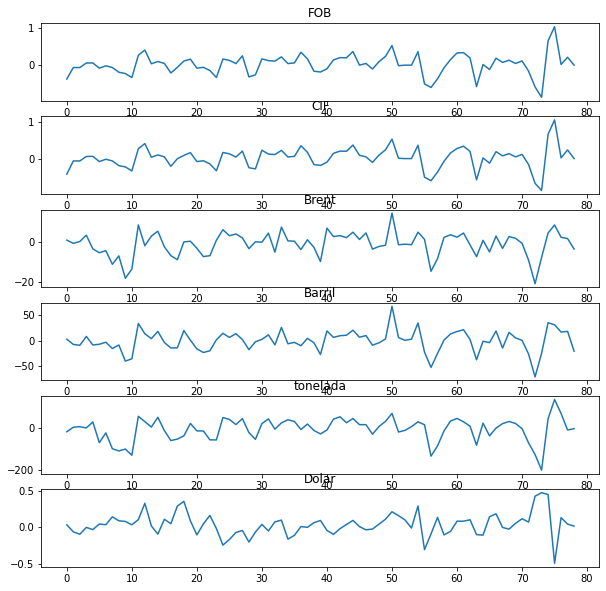

In [26]:
# Plotting the results

results.plot();



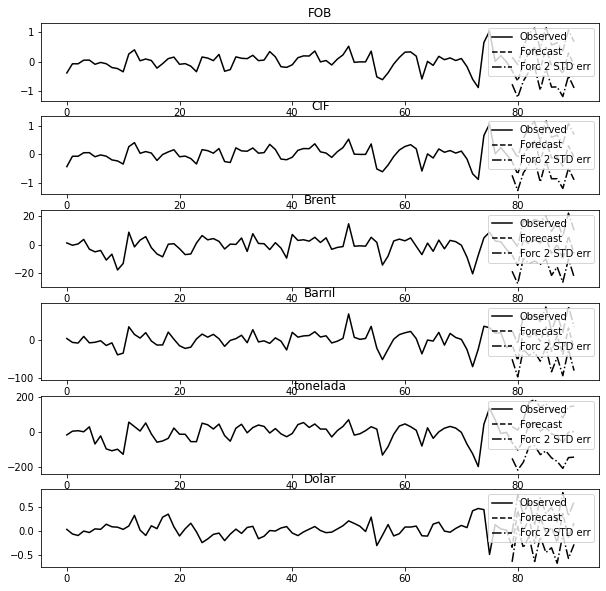

In [27]:
results.plot_forecast(12);

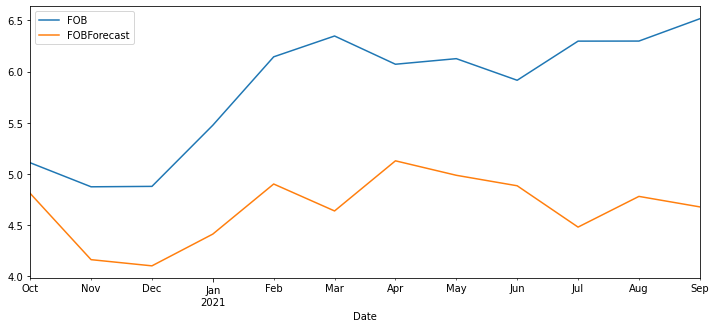

In [28]:
data1['FOB'][-nobs:].plot(figsize=(12,5),legend=True)
df_forecast['FOBForecast'].plot(legend=True);


## Fit the VAR(1) model

In [29]:

from statsmodels.tsa.vector_ar.var_model import VAR

test_obs = 12
train = data1[:-test_obs]
test = data1[-test_obs:]

In [30]:
for i in [1,2,3,4,5,6,7,8]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  -2.1169880675309245
BIC:  -0.857281614320609

Order = 2
AIC:  -2.327250918100952
BIC:  0.029457908588639725

Order = 3
AIC:  -2.0717298185232695
BIC:  1.3983197670782888

Order = 4
AIC:  -1.5832453658118673
BIC:  3.0168862268585235

Order = 5
AIC:  -1.6848718111244372
BIC:  4.062498710445613

Order = 6
AIC:  -1.9750839680888692
BIC:  4.9371113115236405

Order = 7
AIC:  -1.8526537469454496
BIC:  6.242394688894068

Order = 8
AIC:  -2.516121163637333
BIC:  6.78026548901156



/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/cristian/anaconda3/envs/teste/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated freq

In [31]:
result = model.fit(8)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 28, Mar, 2022
Time:                     17:41:02
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    6.78027
Nobs:                     72.0000    HQIC:                   1.18480
Log likelihood:          -228.401    FPE:                   0.486261
AIC:                     -2.51612    Det(Omega_mle):       0.0215850
--------------------------------------------------------------------
Results for equation FOB
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.186946         2.541485            0.074           0.941
L1.FOB             -2.230283         2.141246           -1.042           0.298
L1.CIF              2.974956         2.102625            1.415        

In [32]:
lagged_Values = train.values[-8:]

In [33]:
pred = result.forecast(y=lagged_Values, steps=12) 

idx = pd.date_range('2020-10-01', periods=12, freq='MS')
df_forecast=pd.DataFrame(data=pred, index=idx, columns=['FOB', 'CIF', 'Brent', 'Barril', 'tonelada', 'Dolar'])

In [34]:
df_forecast

,FOB,CIF,Brent,Barril,tonelada,Dolar
2020-10-01,4.331497,4.962947,28.038047,128.440724,496.936085,4.023614
2020-11-01,2.186349,2.686310,-3.525821,-11.871962,200.666067,4.581733
2020-12-01,2.434284,2.994185,15.817467,50.306410,179.176102,4.650485
2021-01-01,2.878706,3.300592,6.604527,35.532481,179.513972,5.420984
2021-02-01,4.535750,5.129124,32.618961,116.075295,435.576385,4.119408
2021-03-01,4.293406,4.695166,42.730753,166.198292,513.541974,5.467698
2021-04-01,7.611924,8.297276,98.391150,405.302945,902.475322,4.860663
2021-05-01,7.174184,7.708795,74.672098,310.712635,938.850679,5.236709
2021-06-01,7.449563,8.367557,66.580987,225.810680,1002.029541,2.324908
2021-07-01,2.675569,3.173574,12.852386,9.771978,426.763479,4.881038


<AxesSubplot:>

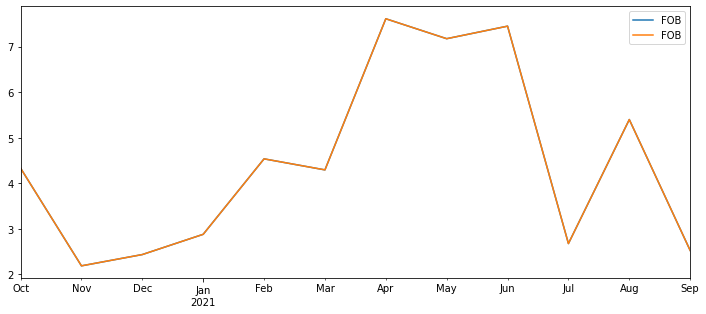

In [35]:
test_original = df_forecast
test_original.index = pd.to_datetime(test_original.index)
test_original['FOB'].plot(figsize=(12,5),legend=True)
df_forecast['FOB'].plot(legend=True)